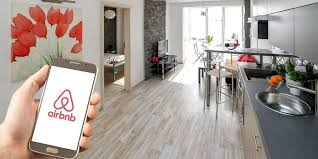

# Boston Airbnb Data Analysis.


## CRISP-DM Process.

### Business Understanding: 
##### From the datasets we can get a better knowledge of how we can set the rental price for properties and figure out some interesting listings in Boston Airbnb. 

### The business questions we are trying to answer:
##### * Most expensive month to visit Boston Airbnb?
##### * Most expensive neighbourhood in Boston?
##### * What are the top amenities people needs most?
##### * Which month do people like to visit Boston Airbnb(Based on review counts)?

### Data Understanding：
##### There are three dataset which I am investigating: 1. Boston listing data, 2. calendar data, 3. reviews data.
##### 1. listing dataset consists of 3585 listings with 95 columns. Basically deals with ids, amenities, addresses, price, review ratings and many more.  
##### 2. calendar dataset consists of listings with 7 columns. Basically deals with date and time, price, availability.
##### 3. review dataset consists of listings with 5 columns. It has reviews, ids, date and time coulmns.
##### Datasets were investigated before any preprocessing.

### Prepare Data: 
##### Including data cleaning, filling NAN value and one-hot encoding.

### Data Modeling:
##### Models are trained and compared. 

### Evaluate the Results:
##### Result and discussion are published in medium : https://medium.com/@nidhivinay24/an-insight-into-boston-airbnb-data-5c003f6dc6a4
##### github: https://github.com/shriyutha/Boston-Airbnb

# Questions of Interest:
* Most expensive month to visit Boston ?
* Most expensive neighbourhood in Boston?
* What are the top amenities people need?
* Which month do people like to visit Boston (Based on review counts)?

## Data Understanding:
* In this section I will try to understand each and every dataset, also analyse all dataset columns.

In [1]:
# Importing required libraries:

import numpy as np
import pandas as pd
import seaborn as sb

import time
from datetime import datetime, date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

%matplotlib inline

## listing data:

In [2]:
# Read in the datasets:

listing_data = pd.read_csv('listings.csv', sep = ',')
calender_data = pd.read_csv('calendar.csv', sep = ',')
review_data = pd.read_csv('reviews.csv', sep = ',')

In [3]:
listing_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [4]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
listing_data.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00
3584,14504422,https://www.airbnb.com/rooms/14504422,20160906204935,2016-09-07,(K1) Private Room near Harvard/MIT,My place is close to My home is a warm and fri...,To ensure a smooth check in: 1. You MUST have ...,My place is close to My home is a warm and fri...,none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,3,NaN


In [6]:
listing_data.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2307,4565470,https://www.airbnb.com/rooms/4565470,20160906204935,2016-09-07,Lux 2BR by Fenway w/WiFi,With its central location to Harvard Medical S...,At this luxurious property apartments are styl...,With its central location to Harvard Medical S...,none,"Characterized by cobblestone streets, clam cho...",...,9.0,f,NaN,NaN,f,moderate,f,t,61,0.15
218,3021446,https://www.airbnb.com/rooms/3021446,20160906204935,2016-09-07,"Priv. bath, breakfast, parking, puppy, T in hi...",King-sized bed and private bath in hip JP just...,Comfy king-sized bed (2 twin beds pushed toget...,King-sized bed and private bath in hip JP just...,none,Our apartment is within quick walking distance...,...,9.0,f,NaN,NaN,t,moderate,f,t,1,3.97
1605,9897713,https://www.airbnb.com/rooms/9897713,20160906204935,2016-09-07,Warm 1 Bedroom Near Airport,"Cozy, recently renovated condo near Logan airp...",We are the first floor from the street entranc...,"Cozy, recently renovated condo near Logan airp...",none,We are extremely close to the Airport (10 minu...,...,8.0,f,NaN,NaN,f,strict,f,f,1,0.13
2619,217498,https://www.airbnb.com/rooms/217498,20160906204935,2016-09-07,"Private bedroom, bath and lounge.",NaN,Our comfortable apartment in this listing is s...,Our comfortable apartment in this listing is s...,none,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,1,2.03
167,4025194,https://www.airbnb.com/rooms/4025194,20160906204935,2016-09-07,Queen Bed/Near Subway/Free Passes,"Comfy queen-size bed, free breakfast, clean sh...",This room is situated in Boston's charming Ros...,"Comfy queen-size bed, free breakfast, clean sh...",none,Roslindale is a fun neighborhood in Boston. It...,...,10.0,f,NaN,NaN,t,flexible,f,f,4,6.20


In [7]:
listing_data.shape

(3585, 95)

In [8]:
# attributes for each Boston entries:

listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
listing_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [11]:
listing_data.describe(include = 'object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,...,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1269,1859,...,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/14344516,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,Located less than a five minute walk to Back B...,...,$0.00,today,2016-09-06,2016-04-05,2016-09-05,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,...,2211,833,3585,23,118,3585,2991,1582,3518,3348


In [12]:
# Check unique values:

listing_data.nunique()

id                                  3585
listing_url                         3585
scrape_id                              1
last_scraped                           1
name                                3504
                                    ... 
cancellation_policy                    4
require_guest_profile_picture          2
require_guest_phone_verification       2
calculated_host_listings_count        25
reviews_per_month                    644
Length: 95, dtype: int64

In [13]:
# Columns with no missing values:

set(listing_data.columns[listing_data.isnull().mean() == 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [14]:
# Number of columns with no missing values:

np.sum(np.sum(listing_data.isnull()) / listing_data.shape[0] == 0)

51

In [15]:
# Columns with 50% missing values:

set(listing_data.columns[listing_data.isnull().mean() > 0.5])

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [16]:
# List of amenities:

listing_data.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                       15
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}    14
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heati

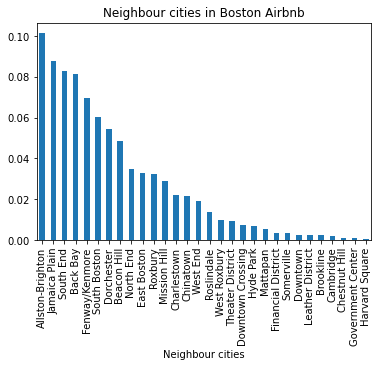

In [17]:
# Explore neighbourhood cities:

neighbour = listing_data.neighbourhood.value_counts()
(neighbour / listing_data.shape[0]).plot(kind = 'bar')
plt.title('Neighbour cities in Boston Airbnb')
plt.xlabel('Neighbour cities');

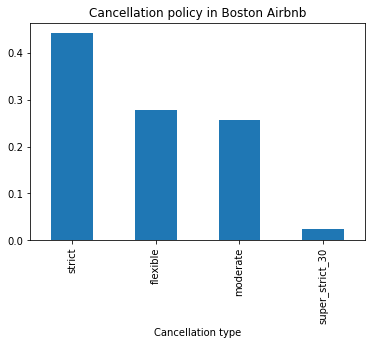

In [18]:
# Explore cancellation policy in airbnb:

policy = listing_data.cancellation_policy.value_counts()
(policy / listing_data.shape[0]).plot(kind = 'bar')
plt.title('Cancellation policy in Boston Airbnb')
plt.xlabel('Cancellation type');

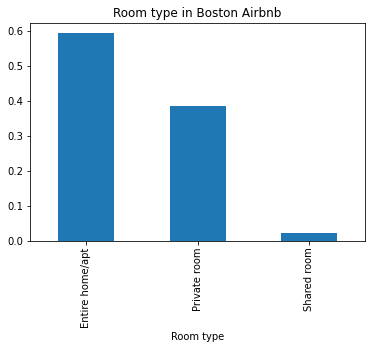

In [19]:
# Explore room type in Boston airbnb:

room = listing_data.room_type.value_counts()
(room / listing_data.shape[0]).plot(kind = 'bar')
plt.title('Room type in Boston Airbnb')
plt.xlabel('Room type');

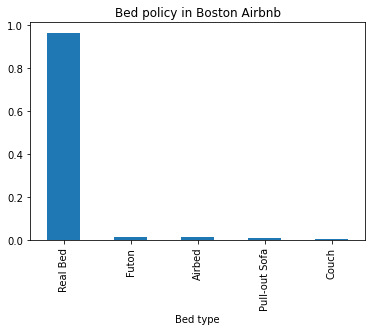

In [20]:
# Explore bed type in Boston airbnb:

bed = listing_data.bed_type.value_counts()
(bed / listing_data.shape[0]).plot(kind = 'bar')
plt.title('Bed policy in Boston Airbnb')
plt.xlabel('Bed type');

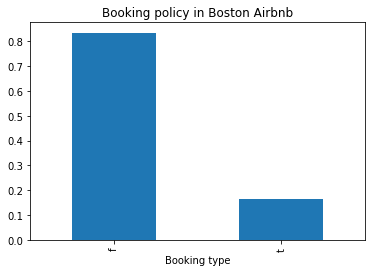

In [21]:
# Explore Booking type in Boston airbnb:

book = listing_data.instant_bookable.value_counts()
(book / listing_data.shape[0]).plot(kind = 'bar')
plt.title('Booking policy in Boston Airbnb')
plt.xlabel('Booking type');

#### Summarized listing data contains 3585 rows with 95 columns. Basically deals with ids, amenities, addresses, price, review ratings and many more.

### Insights:
* Missing values in many columns.
* Strict cancelattion policy
* Most of them prefered entire house/apt than only rooms and bath.
* There are 30 neighbourhood cities in Boston airbnb with top Allston-Brighton.
* avilability_365 is 103 days.
* 1680 customers reviewed review_scores_accuracy 10/10 and only 3 customer reviewed 2/10
* 1426 customers prefered 1 night stay followed by 998 customers prefered 2 nights stay.


###  Wrangling:
* Drop unrequired columns.
* Change datatype for price, host_since, amenities, host_response_rate, cleaning_fee
* Replace f, t with NO, YES in is_location_exact, require_guest_phone_verification, host_is_superhost
* Drop na values.
* Fill mean values for 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'cleaning_fee'
* Fill 0 for bedrooms, bathrooms, beds
* Fill Unkown for city, neighborhood, property_type
* Drop missing values



In [22]:
# Drop Unused columns:

listing = ['id', 'host_id','scrape_id', 'last_scraped', 'name', 'summary', 'description', 
           'neighborhood_overview', 'transit', 'access', 'interaction', 'instant_bookable',
           'neighborhood_overview', 'thumbnail_url', 'listing_url', 'host_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_location', 
           'host_about', 'host_response_time', 'host_acceptance_rate', 'calendar_last_scraped',
           'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
           'street', 'neighbourhood_cleansed', 'state', 'market', 'smart_location',
           'country_code', 'country', 'first_review', 'last_review', 'experiences_offered', 'host_has_profile_pic', 'space',
           'host_verifications', 'host_identity_verified', 'require_guest_profile_picture', 'requires_license', 'house_rules', 'notes']

listing_data.drop(listing, axis = 1, inplace = True)


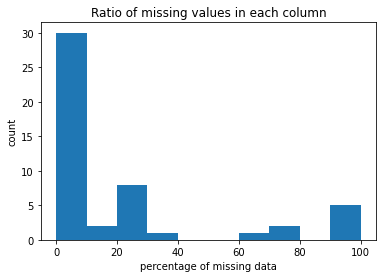

In [23]:
# Drop part of columns with ratio of missing columns:

def Drop(data):
    null_val = data.isnull().sum()
    total_val = null_val / (data.shape[0]) * 100
    plt.hist(total_val)
    plt.title('Ratio of missing values in each column')
    plt.xlabel('percentage of missing data')
    plt.ylabel('count')
    
    final_val = total_val[total_val > 50].index
    data.drop(final_val, axis = 1, inplace = True)
    
Drop(listing_data)

In [26]:
# convert price to float

def Converter(column):
    try:
        
        if '$' in column:
            column = column.replace('$', '')
            return float(str(column))
    except:
        return column
    

listing_data['price'] = listing_data['price'].apply(lambda ele: Converter(ele))
listing_data['cleaning_fee'] = listing_data['cleaning_fee'].apply(lambda ele: Converter(ele))
listing_data['extra_people'] = listing_data['extra_people'].apply(lambda ele: Converter(ele))

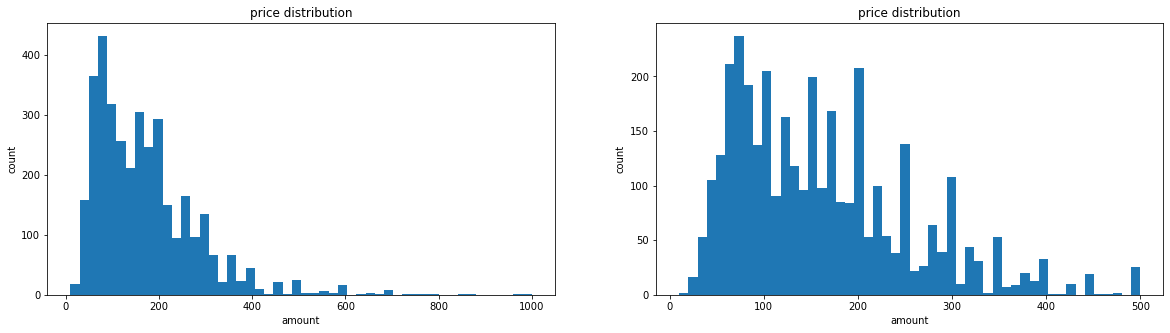

In [27]:
# explore price:

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.hist(listing_data.price, bins = 50)
plt.title('price distribution')
plt.xlabel('amount')
plt.ylabel('count');

plt.subplot(1,2,2)
plt.hist(listing_data.price[listing_data.price <=500], bins = 50)
plt.title('price distribution')
plt.xlabel('amount')
plt.ylabel('count');

In [28]:
# Detail describtion:

listing_data[['minimum_nights', 'cleaning_fee', 'price', 'availability_365', 'number_of_reviews', 'reviews_per_month']].describe()

,minimum_nights,cleaning_fee,price,availability_365,number_of_reviews,reviews_per_month
count,3585.000000,2478.000000,3573.000000,3585.000000,3585.000000,2829.000000
mean,3.171269,68.380145,169.072768,179.346444,19.044630,1.970908
std,8.874133,51.297835,111.677022,142.136180,35.571658,2.120561
min,1.000000,5.000000,10.000000,0.000000,0.000000,0.010000
25%,1.000000,25.000000,85.000000,19.000000,1.000000,0.480000
50%,2.000000,50.000000,150.000000,179.000000,5.000000,1.170000
75%,3.000000,100.000000,220.000000,325.000000,21.000000,2.720000
max,300.000000,300.000000,999.000000,365.000000,404.000000,19.150000


In [29]:
# replace t with YES and f with NO:

def Replacer(col):
    try:
        if 't' in col: 
            col = col.replace('t', 'Yes')
            return col
        elif 'f' in col:
            col = col.replace('f', 'No')
            return col
    except:
        return col
    
listing_data['host_is_superhost'] = listing_data['host_is_superhost'].apply(lambda ele: Replacer(ele))
listing_data['require_guest_phone_verification'] = listing_data['require_guest_phone_verification'].apply(lambda ele: Replacer(ele))
listing_data['is_location_exact'] = listing_data['is_location_exact'].apply(lambda ele: Replacer(ele))

In [30]:
#  Remore % and convert to float:

def Clean(col):
    try:
        return float(str( col[:-1]))/100
    except:
        return col
    
listing_data['host_response_rate'] = listing_data['host_response_rate'].apply(lambda ele: Clean(ele))


new = listing_data['host_response_rate'].str.split('%', expand = True)
listing_data['host_response_rate'] = new[0]
listing_data['host_response_rate'] = listing_data['host_response_rate'].astype(float)
listing_data['host_response_rate'] = listing_data.host_response_rate/100

In [31]:
# Change format:

now = datetime.now()
listing_data.host_since = listing_data.host_since.apply(lambda ele: (now - datetime.strptime(ele, "%Y-%m-%d")).days)


In [32]:
listing_data[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


* mean value for all review scores were around 90/100 and 9/10

In [33]:
# Fill mean value:

lists = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'cleaning_fee']

for ele in lists:
    listing_data[ele].fillna(listing_data[ele].mean(), axis = 0, inplace = True)

In [34]:
# Fill Unknown for object type:

listing_data.neighbourhood = listing_data.neighbourhood.fillna('Unknown')
listing_data.city = listing_data.city.fillna('Unknown')
listing_data.property_type = listing_data.property_type.fillna('Unknown')

In [35]:
# Fill 0 for price

listing_data.price = listing_data.price.fillna(0)

In [36]:
listing_data[['bedrooms', 'bathrooms', 'beds']].describe()

,bedrooms,bathrooms,beds
count,3575.000000,3571.000000,3576.000000
mean,1.255944,1.221647,1.609060
std,0.753060,0.501487,1.011745
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000
max,5.000000,6.000000,16.000000


listing_data.zipcode = listing_data.zipcode.str[:5].astype(float)

In [37]:
# Fill mode for bedroom and bathroom:

lists = ['bedrooms', 'bathrooms', 'beds']
for ele in lists:
    listing_data[ele].fillna(listing_data[ele].median(), axis = 0, inplace = True)

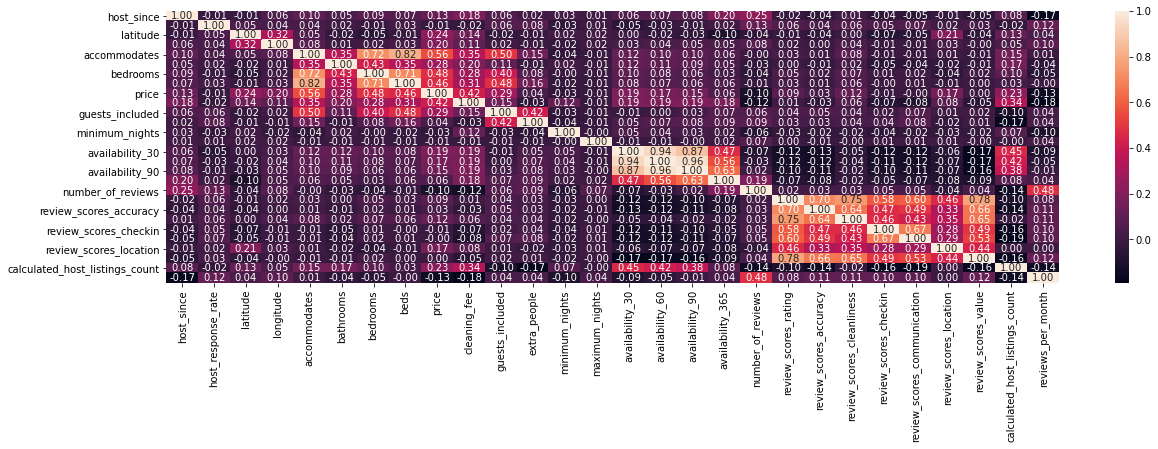

In [38]:
# Plot correlation for columns:

plt.figure(figsize = [20,5])

sb.heatmap(listing_data.corr(), annot=True, fmt=".2f");

In [39]:
# Change datatype:

amenities = listing_data.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])

mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)
# list(mlb.classes_)

In [40]:
# Drop amenities:

listing_data.drop(['amenities'], axis = 1, inplace = True)

In [41]:
# Combine ameamenities to listing data:

listing_data = pd.concat([listing_data, fit], axis = 1, sort = False)

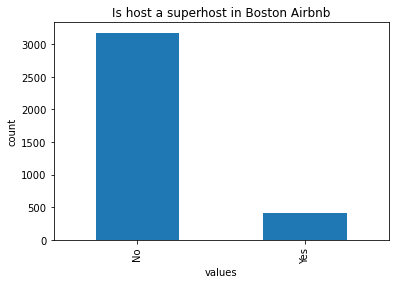

In [42]:
# Explore superhost:

listing_data.host_is_superhost.value_counts().plot(kind = 'bar')
plt.title('Is host a superhost in Boston Airbnb')
plt.xlabel('values')
plt.ylabel('count');

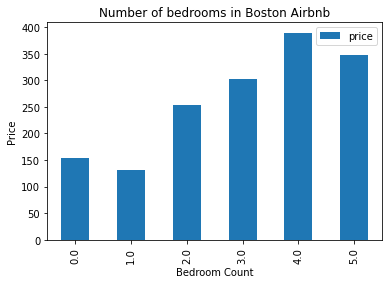

In [43]:
# Explore number of bedrooms:

listing_data.groupby('bedrooms').mean()[['price']].plot(kind = 'bar')
plt.title('Number of bedrooms in Boston Airbnb')
plt.xlabel('Bedroom Count')
plt.ylabel('Price');

In [44]:
# Drop na values:

listing_data = listing_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

## Calendar data :

In [45]:
# read dataset:

calender_data = pd.read_csv('calendar.csv', sep = ',')

In [46]:
calender_data

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [47]:
calender_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [48]:
calender_data.tail()

,listing_id,date,available,price
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [49]:
calender_data.sample(5)

,listing_id,date,available,price
719567,9248612,2017-01-22,f,NaN
184618,10537553,2017-07-24,f,NaN
326958,13549924,2016-10-08,t,$204.00
1097930,13927765,2017-05-27,t,$144.00
734798,13993185,2017-07-14,f,NaN


In [50]:
calender_data.shape

(1308890, 4)

In [51]:
calender_data.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [52]:
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [53]:
calender_data.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [54]:
calender_data.describe(include = 'object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-04-22,f,$150.00
freq,3586,665853,20752


In [55]:
# Columns with 0 missing values:

set(calender_data.columns[calender_data.isnull().mean() == 0])

{'available', 'date', 'listing_id'}

In [56]:
# Columns with 50% missing values:

set(calender_data.columns[calender_data.isnull().mean() > 0.5])

{'price'}

In [57]:
calender_data.price.value_counts()

$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$1,258.00        1
$2,158.00        1
$1,187.00        1
$1,229.00        1
$1,091.00        1
Name: price, Length: 1246, dtype: int64

In [58]:
sum(calender_data.duplicated())

365

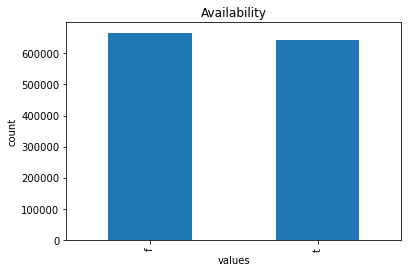

In [59]:
# explore availability:

calender_data.available.value_counts().plot(kind = 'bar')
plt.title('Availability')
plt.xlabel('values')
plt.ylabel('count');

#### Summarized listing data contains 3585 rows with 4 columns. Basically deals with ids, availabilities, price, date and time.

### Insights:
* Missing values in price columns.
* Duplicates in dataset.
* Not available rate is 50.8% and 49.2% rate for availablity of airbnb.
* price vary from $65 to $1875 but top prefered was $150 by 20752 customer.

### Wrangling:
* Drop missing values in price.
* Drop duplicate values from data.
* Repalce availabe column values.
* convert date column.
* Convert price column to float.

In [60]:
# Drop duplicates:

calender_data.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [69]:
# Drop na values:

calender_data = calender_data.dropna(subset = ['price'], axis = 0)

In [70]:
# Convert price to float:

calender_data['price'] = calender_data['price'].apply(lambda ele: Converter(ele))

In [63]:
# replace t = Yes and f = NO:

calender_data['available'] = calender_data['available'].replace('t', 'Available')
calender_data['available'] = calender_data['available'].replace('f', 'Not_Available')

<ipython-input-63-1c9f45453a12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_data['available'] = calender_data['available'].replace('t', 'Available')
<ipython-input-63-1c9f45453a12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_data['available'] = calender_data['available'].replace('f', 'Not_Available')


In [64]:
# Change data format:

calender_data['date'] = pd.to_datetime(calender_data.date)
    
month = calender_data['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})

day = calender_data['date'].dt.weekday
day = day.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
 
year = calender_data['date'].dt.year
    
calender_data['Month'] = month
calender_data['Day'] = day
calender_data['Year'] = year

<ipython-input-64-3dc4c614871b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_data['date'] = pd.to_datetime(calender_data.date)
<ipython-input-64-3dc4c614871b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_data['Month'] = month
<ipython-input-64-3dc4c614871b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

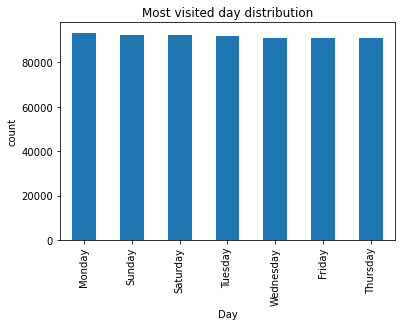

In [65]:
calender_data.Day.value_counts().plot(kind = 'bar')
plt.title('Most visited day distribution')
plt.xlabel('Day')
plt.ylabel('count');

C:\Users\Vinay Krishna\Downloads\empty\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


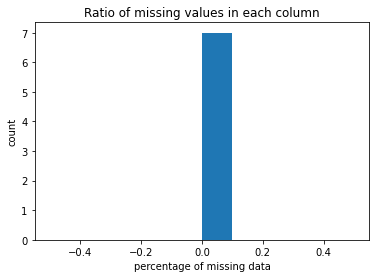

In [66]:

# Drop part of columns with ratio of missing columns:

Drop(calender_data)

In [71]:
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  object        
 3   price       640469 non-null  float64       
 4   Month       643037 non-null  object        
 5   Day         643037 non-null  object        
 6   Year        643037 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 39.2+ MB


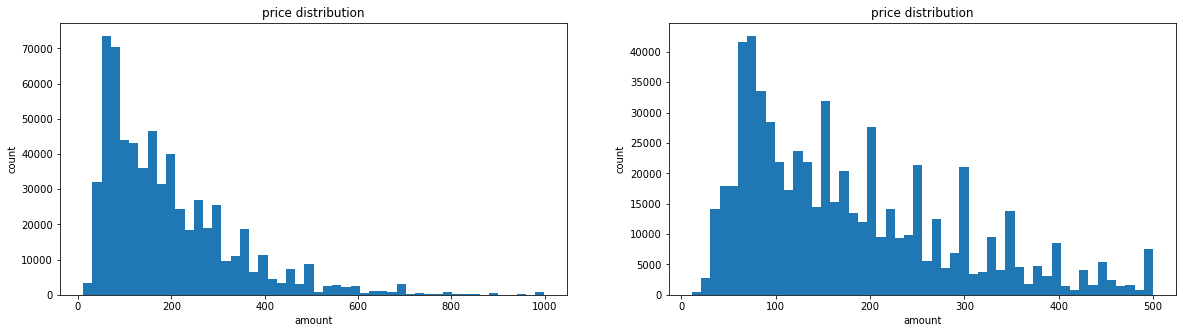

In [72]:
# explore price:

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.hist(calender_data.price, bins = 50)
plt.title('price distribution')
plt.xlabel('amount')
plt.ylabel('count');

plt.subplot(1,2,2)
plt.hist(calender_data.price[calender_data.price <=500], bins = 50)
plt.title('price distribution')
plt.xlabel('amount')
plt.ylabel('count');

## review data:

In [73]:
# read data:

review_data = pd.read_csv('reviews.csv', sep = ',')

In [74]:
review_data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [75]:
review_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [76]:
review_data.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...
68274,7462268,98550693,2016-08-31,90128094,Arianna,The room itself and the aprtment were very cle...


In [77]:
review_data.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
27991,3775876,47766746,2015-09-21,21324691,Jes,"This was my first airbnb stay, and it was just..."
60690,7244031,79604554,2016-06-13,7200021,Sam,Greg's place was the quintessential Beacon Hil...
32570,766700,32745530,2015-05-21,23902226,Jasmine,The place is nice and convenient. But you are ...
5189,5729845,45848523,2015-09-06,37109069,Pia,Lisa and Jon were very nice hosts! We enjoyed ...
7043,6676364,42553970,2015-08-14,37705217,Susan,Great place to stay while visiting the city. C...


In [78]:
review_data.shape

(68275, 6)

In [79]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [80]:
review_data.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [81]:
review_data.describe(include = 'object')

,date,reviewer_name,comments
count,68275,68275,68222
unique,2045,14775,67311
top,2016-04-19,David,The host canceled this reservation the day bef...
freq,342,654,112


In [82]:
sum(review_data.duplicated())

0

#### Summarized listing data contains 68275 rows with 6 columns. Basically deals with comments, reviews, date and time.

### Insights:
* Missing values in comments columns.
* people prefered weekends to visit airbnb than weekdays.

### Wrangling:
* Fill missing values.
* convert date column.

In [83]:
# Change data format:

review_data['date'] = pd.to_datetime(review_data.date)
    
month = review_data['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})

day = review_data['date'].dt.weekday
day = day.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
 
year = review_data['date'].dt.year
    
review_data['Month'] = month
review_data['Day'] = day
review_data['Year'] = year

In [84]:
# Fill comment column:

review_data.comments = review_data.comments.fillna('Unknown')

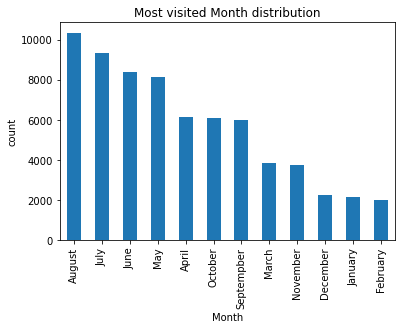

In [85]:
# Plot most visited month: 

review_data.Month.value_counts().plot(kind = 'bar')
plt.title('Most visited Month distribution')
plt.xlabel('Month')
plt.ylabel('count');

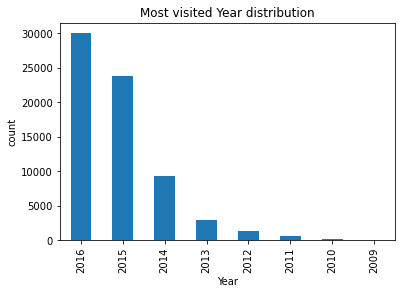

In [86]:
# Plot most visited month: 

review_data.Year.value_counts().plot(kind = 'bar')
plt.title('Most visited Year distribution')
plt.xlabel('Year')
plt.ylabel('count');

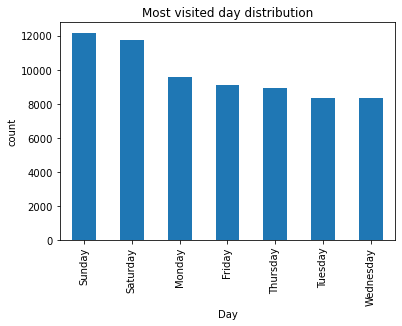

In [87]:
# Plot most visited day: 

review_data.Day.value_counts().plot(kind = 'bar')
plt.title('Most visited day distribution')
plt.xlabel('Day')
plt.ylabel('count');

#  Most expensive month to visit Boston Airbnb?

In [88]:
new = calender_data.groupby(['Month']).mean()[['price']].sort_values(by = 'price', ascending = False)
new = new.rename({'price': 'amount'}, axis = 'columns')
new

,amount
Month,
Septempber,232.270021
October,230.692687
November,199.607143
July,194.293234
August,191.822004
June,190.662144
December,188.455175
April,188.370175
May,185.292694


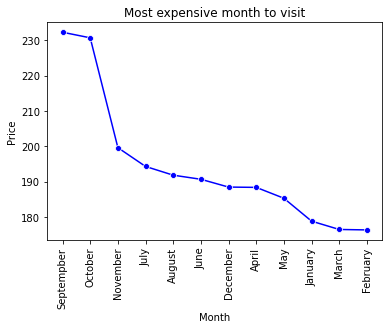

In [89]:
# Plot Most expensive month to visit: 

sb.lineplot(x = new.index, y = 'amount', data = new, color = 'b', legend = False, marker = 'o')
plt.xticks(rotation = 90)
plt.title('Most expensive month to visit')
plt.xlabel('Month')
plt.ylabel('Price');

* according to graph, the most expensive month was Septemper with $ 232.2 followed by October, November.
* March and February month was consider as less expensive.

In [90]:
m_date = calender_data.groupby(['date']).mean()[['price']]
m_date = m_date.rename({'price': 'avg_cost'}, axis = 'columns')
m_date



,avg_cost
date,
2016-09-06,239.710018
2016-09-07,251.030075
2016-09-08,247.238716
2016-09-09,260.044944
2016-09-10,262.165618
...,...
2017-09-01,186.730964
2017-09-02,188.622060
2017-09-03,185.220982


In [91]:
c_date = calender_data.groupby(['date']).count()[['price']]
c_date = c_date.rename({'price': 'total_costs'}, axis = 'columns')
c_date

,total_costs
date,
2016-09-06,569
2016-09-07,931
2016-09-08,997
2016-09-09,979
2016-09-10,954
...,...
2017-09-01,1773
2017-09-02,1786
2017-09-03,1792


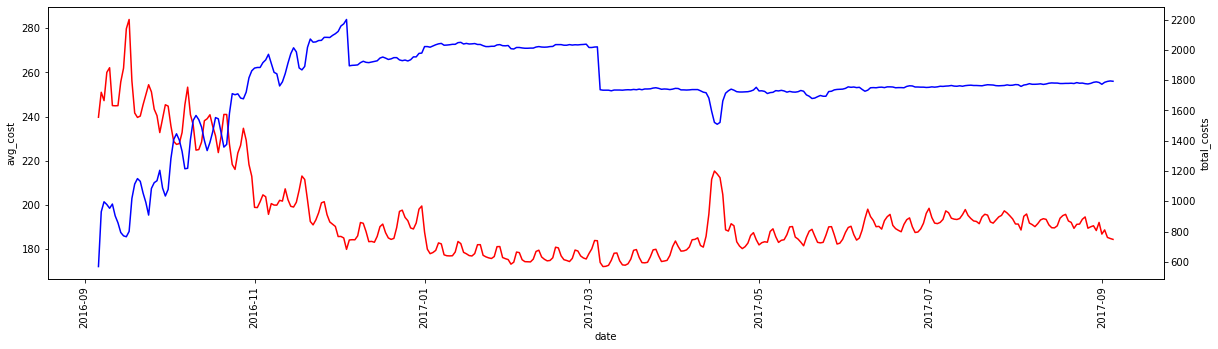

In [92]:
f, ax = plt.subplots(figsize = (20,5))
plt1 = sb.lineplot(x = m_date.index, y = 'avg_cost', data = m_date, color = 'r', legend = False)
plt.xticks(rotation = 90)

ax2 = ax.twinx()
plt2 = sb.lineplot(x = c_date.index, y = 'total_costs', data = c_date, color = 'b', legend = False)
plt.xticks(rotation = 90);


* According to graph, as availability of the houses decreases, price is increasing.
* Price was spike during September to November and again slightly high during the moth of May.
* From June to August, avilability was stabilized.

# Most expensive neighbourhood in Boston?

In [93]:
neighbour = listing_data.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False)[:10]
neighbour

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     273.500000
Leather District      245.875000
Back Bay              241.161512
Chinatown             235.410256
Theater District      234.151515
West End              221.602941
Beacon Hill           212.080460
South Boston          207.814815
Name: price, dtype: float64

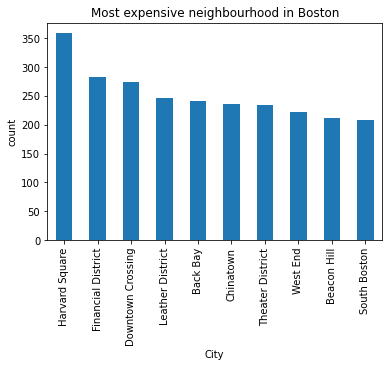

In [94]:
# Most expensive neighbourhood in Boston:

neighbour.plot(kind = 'bar')
plt.title('Most expensive neighbourhood in Boston')
plt.xlabel('City')
plt.ylabel('count');

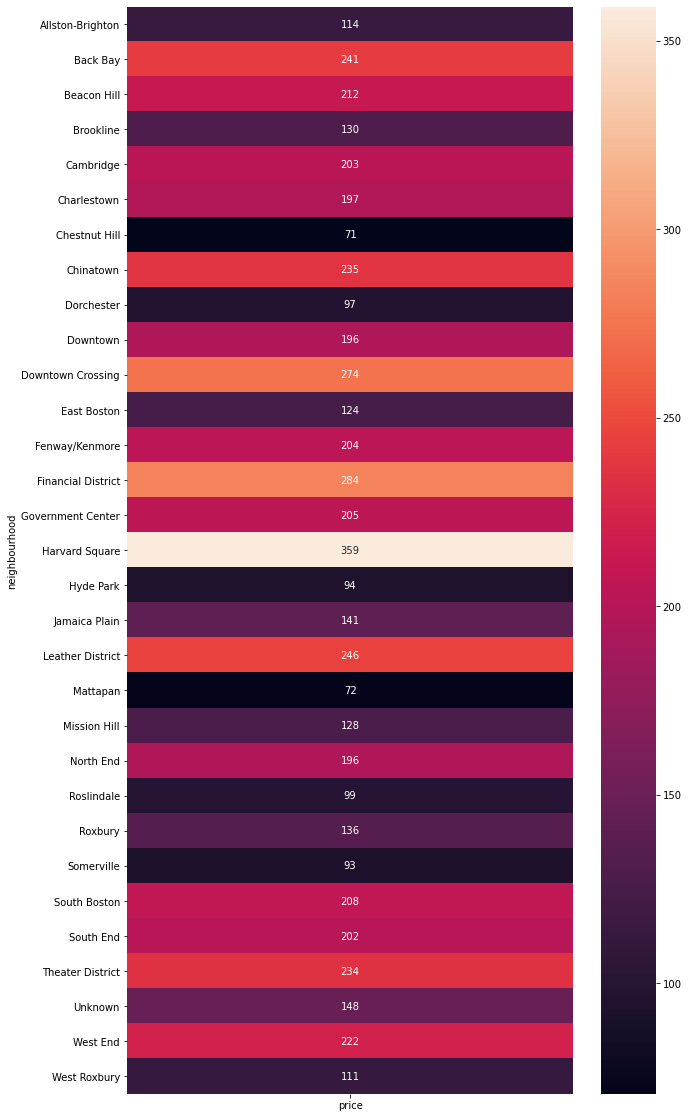

In [95]:
# Plot heatmap:

plt.figure(figsize = (10,20))
sb.heatmap(listing_data.groupby(['neighbourhood']).mean()[['price']], annot=True, fmt='.0f');

* According to graph, Harvard Square is the most expensive neighbourhood city with $359 in Boston Airbnb followed by Financial District

#  What are the top amenities people needs most?


In [96]:
amenitie = fit
amenitie.sum().sort_values(ascending = False)[:10]

Wireless Internet    3421
Heating              3384
Kitchen              3284
Essentials           2994
Smoke Detector       2911
Air Conditioning     2821
TV                   2607
Internet             2577
Dryer                2476
Washer               2475
dtype: int64

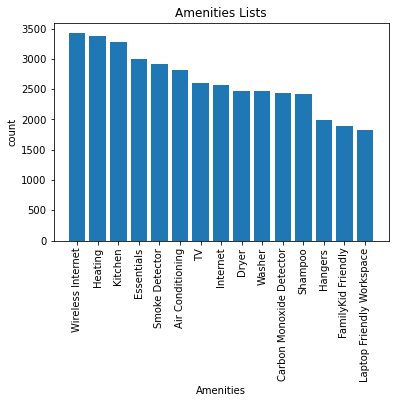

In [97]:
# Plot Amenities Lists:

amen = fit.sum().sort_values(ascending = False)[:15]
#plt.figure(figsize = [20,5])
plt.bar(amen.index, amen.values)
plt.title('Amenities Lists')
plt.xlabel('Amenities')
plt.ylabel('count')
plt.xticks(rotation = 90);

* According to graph, top amenities that visitors liked was wireless interent, followed by heating, kitchen

# Which month do visitors like to visit Boston Airbnb(Based on review counts)?

In [98]:
new = review_data.groupby(['Month']).count()[['reviewer_id']].sort_values(by = 'reviewer_id', ascending = False)
new

,reviewer_id
Month,
August,10345
July,9333
June,8369
May,8115
April,6116
October,6095
Septempber,5985
March,3853
November,3729


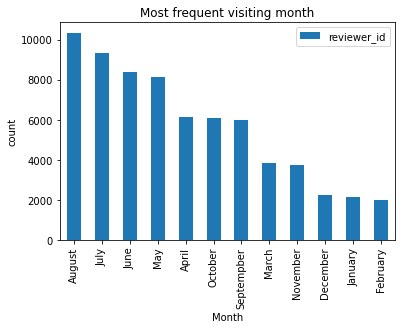

In [99]:
# Most frequent visiting month:

new.plot(kind='bar')
plt.title('Most frequent visiting month')
plt.xlabel('Month')
plt.ylabel('count');

* According to graph, in the month of August most of the visitors like to visit the Boston Airbnb followed by July, June, May.
* In the month of January and February and December, number of visitor were less

# Data Modeling:


In [100]:
# Create new list from listing_data(only int and float)

num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
             'cleaning_fee', 'guests_included','host_response_rate', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'extra_people']

In [101]:
# Add list to new variable:

data = listing_data.select_dtypes(include=['int64', 'float64'])[num]

In [102]:
# Create new list from listing_data(only Object)

cat = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 'property_type', 'is_location_exact']

In [103]:
# combine both num and cat into data dataset:

data[cat] = listing_data[cat]

In [104]:
# Copy original data:

d_data = data.copy()

In [105]:
# OneHotEncoder:

new_data = pd.get_dummies(d_data)

In [106]:
# Drop na values:

new_data = new_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [107]:
# Split data:

y = new_data['price']
X = new_data.drop('price',  axis =1 )

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

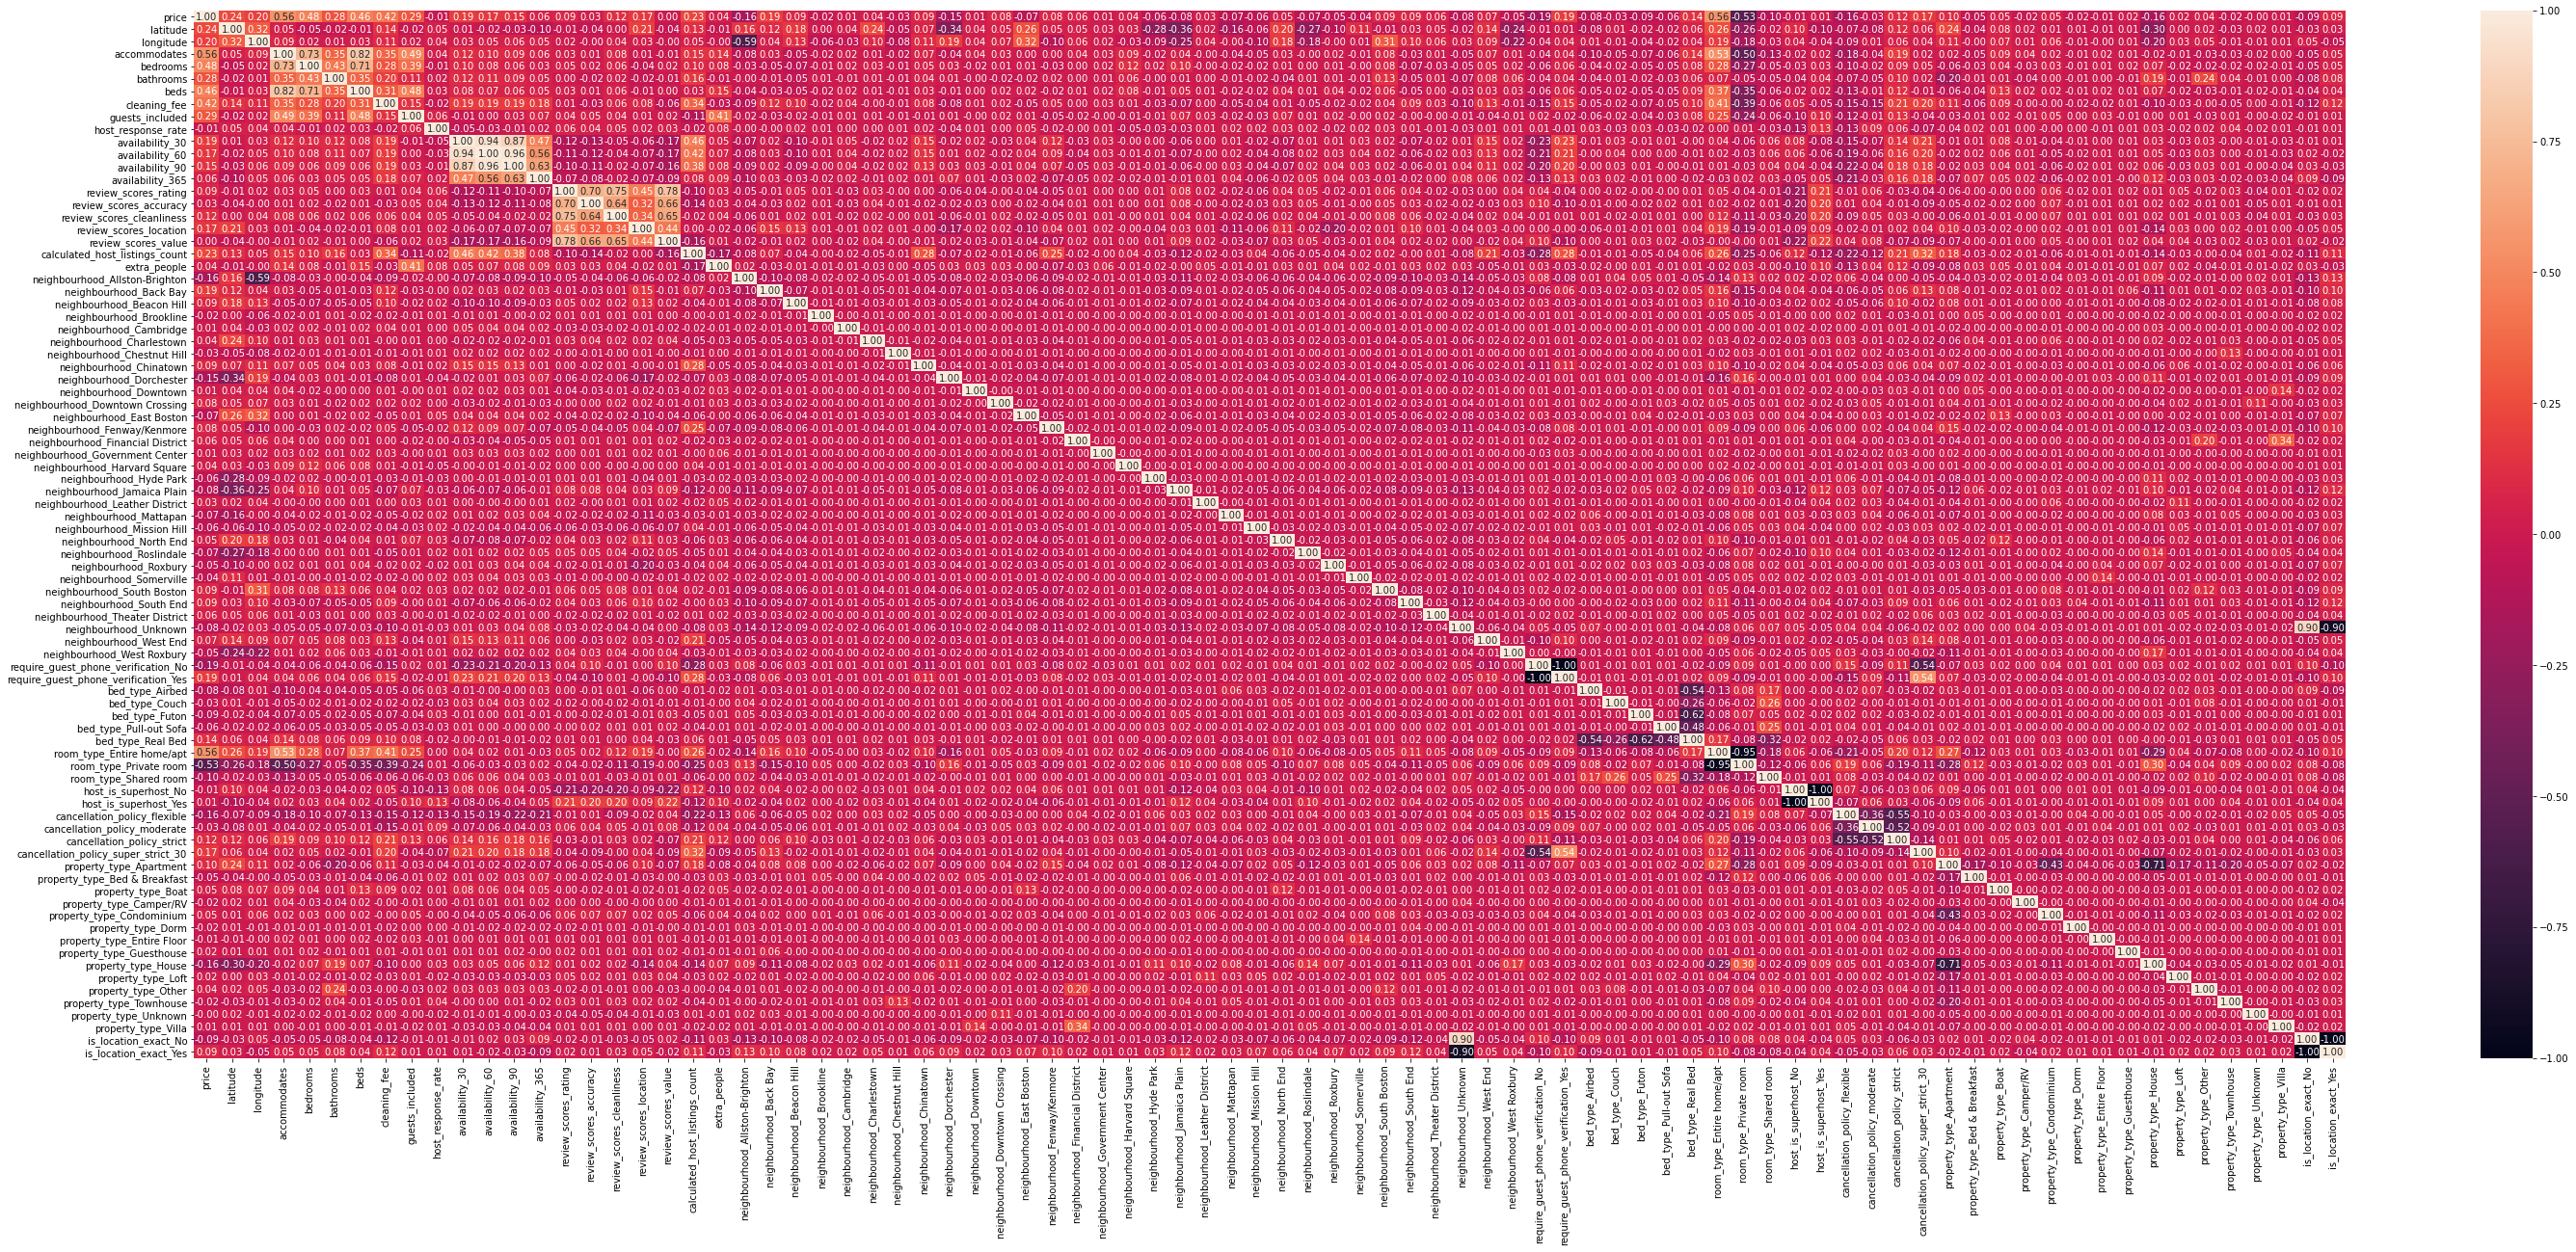

In [109]:
# Plot correlation for columns:

plt.figure(figsize = [50,20])

sb.heatmap(new_data.corr(), annot=True, fmt=".2f");

* Since there is a linearity between few columns(from heatmap), will fit regression models.

## Linear Regression:


In [110]:
# Linear Regression Model:

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.571201890888329

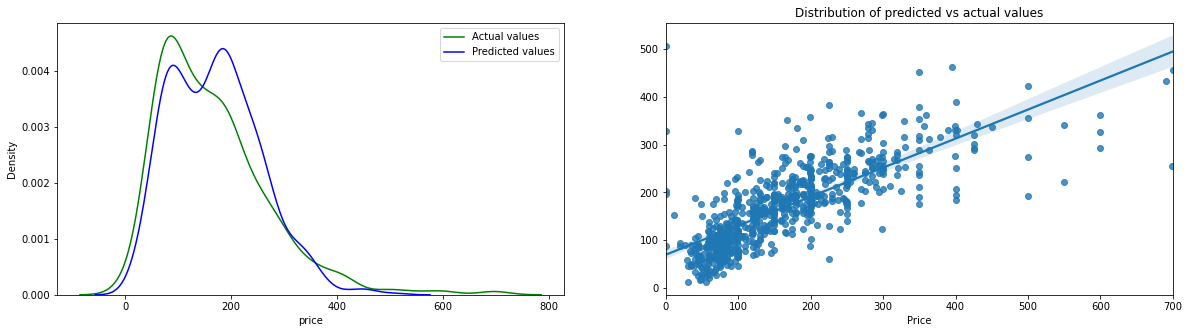

In [111]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');


## Random Forest:

In [112]:
# random Forest Model:

ran = RandomForestRegressor(n_estimators=80, random_state=42)
ran.fit(X_train, y_train)

y_preds = ran.predict(X_test)
r2_score(y_test, y_preds)

0.6277095105690187

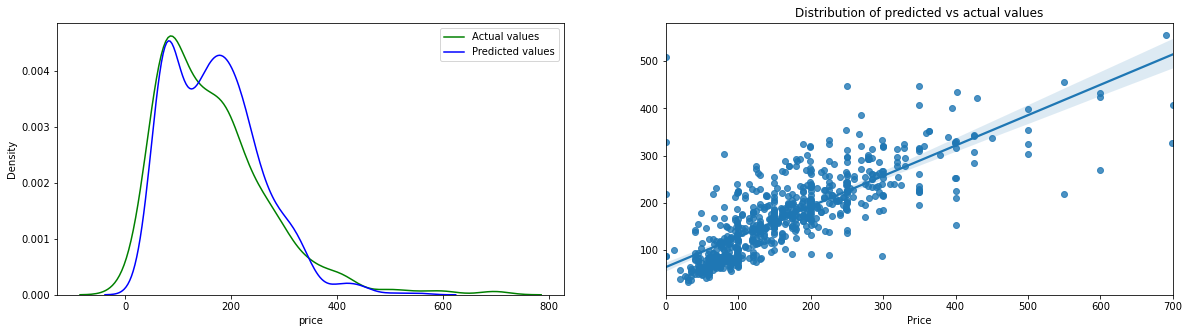

In [113]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');


## Ridge Regression:

In [114]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_p = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_p))
RMSE

69.4682115427487

In [115]:
rid_model = RidgeCV(alphas=np.arange(0, 1, 0.10), cv=10, scoring='neg_mean_absolute_error')

rid_model.fit(X_train, y_train)

print('alpha: %f' % rid_model.alpha_)

alpha: 0.200000


In [116]:
ridge_model = Ridge(alpha=0.2)
ridge_model.fit(X_train, y_train)

y_predict = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predict))

69.18855856801227

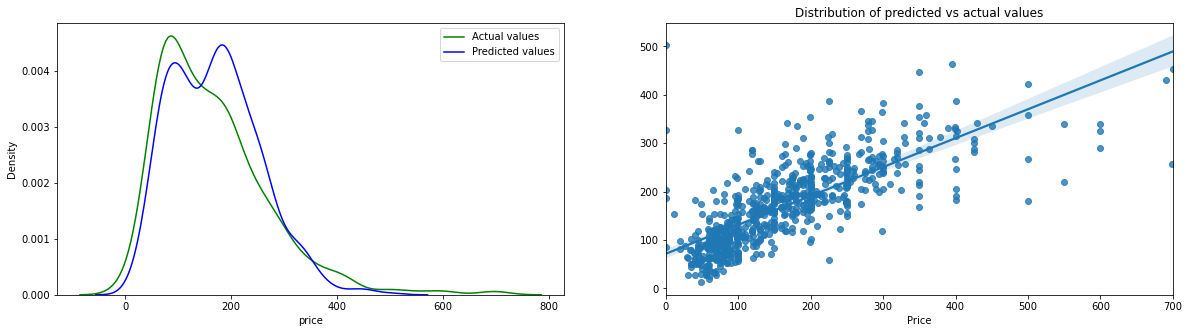

In [117]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_p, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_p)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

From above regression models, Random forest model is best with r2_score = 0.616 compare to other two. 

## For this part i will use KMeans clustering to listings into different clusters to understand the popularity of a listing.

* The elbow method will be used to determine the number of clusters for the data set.

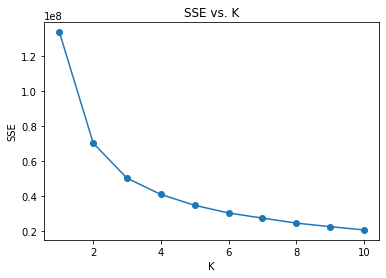

In [118]:
from sklearn.cluster import KMeans

wcss = []
for ele in range(1,11):
    k = KMeans(n_clusters = ele, init='k-means++', random_state=42)
    k.fit(new_data)
    wcss.append(k.inertia_)
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K');

In [119]:
k = KMeans(n_clusters = 10, init='k-means++', random_state=42)
new = k.fit_predict(new_data)
new

array([8, 3, 3, ..., 8, 7, 2])

# Data Evalution:

For this part i will use KMeans clustering to listings into different clusters to understand the popularity of a listing

In [120]:
# add new column cluster to data:

new_data['cluster'] = pd.Series(new, index=new_data.index)
new_data.head()

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes,cluster
0,250.0,42.282619,-71.133068,4,2.0,1.5,3.0,35.000000,1,0.949891,...,0,1,0,0,0,0,0,0,1,8
1,65.0,42.286241,-71.134374,2,1.0,1.0,1.0,10.000000,0,1.000000,...,0,0,0,0,0,0,0,0,1,3
2,65.0,42.292438,-71.135765,2,1.0,1.0,1.0,68.380145,1,1.000000,...,0,0,0,0,0,0,0,0,1,3
4,79.0,42.284512,-71.136258,2,1.0,1.5,2.0,15.000000,1,1.000000,...,0,1,0,0,0,0,0,0,1,3
5,75.0,42.291690,-71.131893,2,1.0,1.0,1.0,30.000000,1,1.000000,...,0,0,0,0,0,0,0,0,1,2


In [121]:
# Groupby cluster data to find mean values:

c_group = new_data.groupby('cluster').mean()
c_group

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,187.559471,42.346223,-71.076994,3.480176,1.180617,1.120044,1.707048,97.794658,1.685022,0.965128,...,0.000000,0.000000,0.061674,0.015419,0.004405,0.011013,0.000000,0.000000,0.138767,0.861233
1,501.958333,42.349947,-71.073619,5.013889,2.236111,1.729167,2.736111,96.216707,1.694444,0.946212,...,0.000000,0.000000,0.083333,0.013889,0.027778,0.013889,0.000000,0.013889,0.083333,0.916667
2,114.198391,42.336926,-71.086036,2.487936,1.024129,1.131367,1.367292,54.814364,1.356568,0.961658,...,0.002681,0.000000,0.190349,0.005362,0.000000,0.040214,0.000000,0.000000,0.147453,0.852547
3,86.693050,42.327553,-71.089633,2.152510,1.013514,1.240347,1.264479,50.089355,1.135135,0.940962,...,0.003861,0.000000,0.333977,0.005792,0.015444,0.011583,0.000000,0.001931,0.229730,0.770270
4,561.224138,42.342004,-71.079540,6.189655,2.620690,2.000000,3.534483,134.664858,3.034483,0.942402,...,0.000000,0.000000,0.344828,0.017241,0.034483,0.034483,0.000000,0.000000,0.103448,0.896552
5,310.017668,42.347986,-71.075456,4.586572,1.893993,1.358657,2.314488,101.369151,2.007067,0.945085,...,0.000000,0.000000,0.077739,0.003534,0.000000,0.000000,0.000000,0.000000,0.102473,0.897527
6,92.737226,42.339142,-71.095156,2.286131,1.020438,1.113139,1.272993,49.008823,1.162044,0.946663,...,0.001460,0.000000,0.135766,0.016058,0.000000,0.017518,0.001460,0.002920,0.103650,0.896350
7,91.352000,42.331775,-71.090099,2.229333,1.018667,1.134667,1.288000,47.368743,1.208000,0.955222,...,0.000000,0.000000,0.282667,0.005333,0.000000,0.013333,0.000000,0.000000,0.181333,0.818667
8,230.053879,42.347402,-71.076241,3.663793,1.461207,1.229526,1.853448,69.967114,1.627155,0.935941,...,0.000000,0.000000,0.066810,0.015086,0.006466,0.015086,0.002155,0.004310,0.109914,0.890086


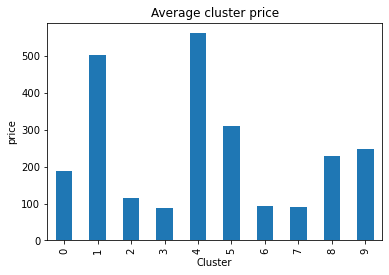

In [122]:
# Plot cluster wrt price:

c_group.price.plot(kind = 'bar')
plt.xlabel('Cluster')
plt.ylabel('price')
plt.title('Average cluster price');

In [123]:
t = c_group.T
t

cluster,0,1,2,3,4,5,6,7,8,9
price,187.559471,501.958333,114.198391,86.693050,561.224138,310.017668,92.737226,91.352000,230.053879,247.441509
latitude,42.346223,42.349947,42.336926,42.327553,42.342004,42.347986,42.339142,42.331775,42.347402,42.347470
longitude,-71.076994,-71.073619,-71.086036,-71.089633,-71.079540,-71.075456,-71.095156,-71.090099,-71.076241,-71.082689
accommodates,3.480176,5.013889,2.487936,2.152510,6.189655,4.586572,2.286131,2.229333,3.663793,4.037736
bedrooms,1.180617,2.236111,1.024129,1.013514,2.620690,1.893993,1.020438,1.018667,1.461207,1.547170
...,...,...,...,...,...,...,...,...,...,...
property_type_Townhouse,0.011013,0.013889,0.040214,0.011583,0.034483,0.000000,0.017518,0.013333,0.015086,0.000000
property_type_Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001460,0.000000,0.002155,0.003774
property_type_Villa,0.000000,0.013889,0.000000,0.001931,0.000000,0.000000,0.002920,0.000000,0.004310,0.000000
is_location_exact_No,0.138767,0.083333,0.147453,0.229730,0.103448,0.102473,0.103650,0.181333,0.109914,0.015094


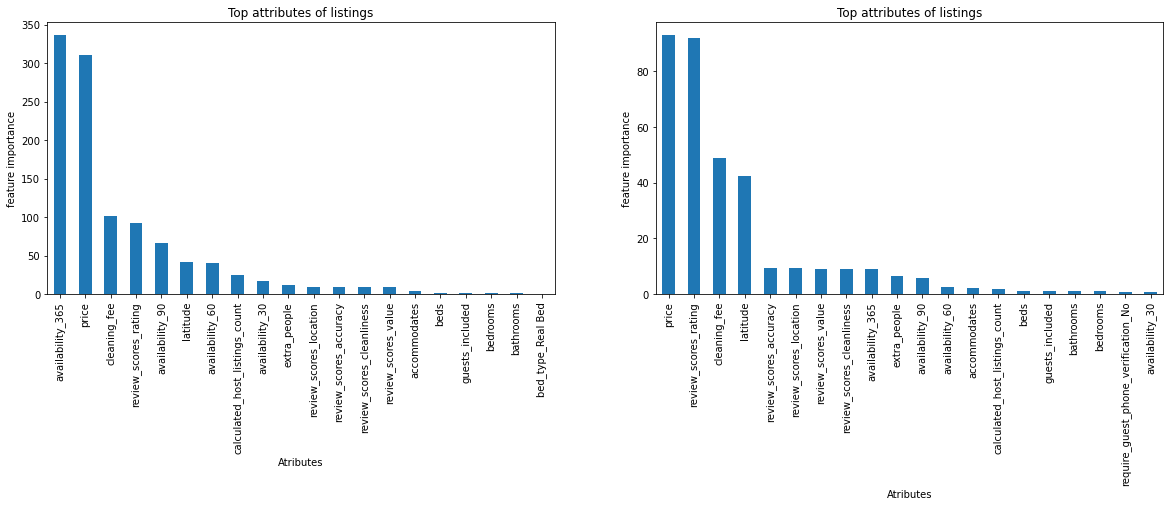

In [124]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
t[5].sort_values(ascending=False).head(20).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('feature importance')
plt.title('Top attributes of listings');

plt.subplot(1,2,2)
t[6].sort_values(ascending=False).head(20).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('feature importance')
plt.title('Top attributes of listings');

In [125]:
# Mean values:

m_val = c_group.mean()
m_val

price                      242.323567
latitude                    42.341643
longitude                  -71.082546
accommodates                 3.612773
bedrooms                     1.501653
                              ...    
property_type_Townhouse      0.015712
property_type_Unknown        0.000739
property_type_Villa          0.002305
is_location_exact_No         0.121520
is_location_exact_Yes        0.878480
Length: 84, dtype: float64

In [128]:
# calculate difference in mean to check different clusters:

dd = (c_group - m_val) *100 / m_val
dd

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,host_response_rate,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Unknown,property_type_Villa,is_location_exact_No,is_location_exact_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,-22.599575,0.010817,-0.007811,-3.670226,-21.378879,-16.966052,-11.172592,22.670591,3.889597,1.639734,...,-100.000000,-100.0,-61.629551,41.409437,-50.265101,-29.905766,-100.000000,-100.000000,14.192749,-1.963273
1,107.143837,0.019614,-0.012559,38.782278,48.909936,28.190972,42.375371,20.691258,4.470534,-0.352300,...,-100.000000,-100.0,-48.154215,27.380723,213.606168,-11.603383,-100.000000,502.569376,-31.423931,4.346849
2,-52.873593,-0.011139,0.004909,-31.135016,-31.799929,-16.126608,-28.852035,-31.242559,-16.361128,1.274385,...,235.044294,-100.0,18.425225,-50.823528,-100.000000,155.947309,-100.000000,-100.000000,21.341034,-2.952089
3,-64.224260,-0.033277,0.009969,-40.419463,-32.506828,-8.047412,-34.202002,-37.169465,-30.013537,-0.905211,...,382.515528,-100.0,107.783494,-46.883714,74.360186,-26.279269,-100.000000,-16.245183,89.047542,-12.317881
4,131.601138,0.000852,-0.004230,71.326980,74.520276,48.269076,83.919174,68.919427,87.090249,-0.753496,...,-100.000000,-100.0,114.534283,58.127794,289.304208,119.467463,-100.000000,-100.000000,-14.871087,2.057106
5,27.935418,0.014981,-0.009974,26.954343,26.127170,0.723427,20.435912,27.154324,23.745205,-0.470969,...,-100.000000,-100.0,-51.635027,-67.592184,-100.000000,-100.000000,-100.000000,-100.000000,-15.673244,2.168068
6,-61.730001,-0.005906,0.017740,-36.720871,-32.045707,-17.477978,-33.758974,-38.524850,-28.354490,-0.304784,...,82.440178,-100.0,-15.532998,47.278149,-100.000000,11.495879,97.581649,26.671518,-14.705386,2.034185
7,-62.301644,-0.023306,0.010626,-38.293017,-32.163662,-15.882011,-32.978059,-40.582116,-25.521073,0.596586,...,-100.000000,-100.0,75.860903,-51.085802,-100.000000,-15.139248,-100.000000,-100.000000,49.221526,-6.808778
8,-5.063349,0.013603,-0.008870,1.412210,-2.693464,-8.849668,-3.554580,-12.235419,0.321831,-1.434008,...,-100.000000,-100.0,-58.433983,38.361820,-27.005461,-3.982985,191.688426,87.004289,-9.550530,1.321118


In [129]:
d = dd.T
d

cluster,0,1,2,3,4,5,6,7,8,9
price,-22.599575,107.143837,-52.873593,-64.224260,131.601138,27.935418,-61.730001,-62.301644,-5.063349,2.112028
latitude,0.010817,0.019614,-0.011139,-0.033277,0.000852,0.014981,-0.005906,-0.023306,0.013603,0.013761
longitude,-0.007811,-0.012559,0.004909,0.009969,-0.004230,-0.009974,0.017740,0.010626,-0.008870,0.000200
accommodates,-3.670226,38.782278,-31.135016,-40.419463,71.326980,26.954343,-36.720871,-38.293017,1.412210,11.762783
bedrooms,-21.378879,48.909936,-31.799929,-32.506828,74.520276,26.127170,-32.045707,-32.163662,-2.693464,3.031087
...,...,...,...,...,...,...,...,...,...,...
property_type_Townhouse,-29.905766,-11.603383,155.947309,-26.279269,119.467463,-100.000000,11.495879,-15.139248,-3.982985,-100.000000
property_type_Unknown,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,97.581649,-100.000000,191.688426,410.729924
property_type_Villa,-100.000000,502.569376,-100.000000,-16.245183,-100.000000,-100.000000,26.671518,-100.000000,87.004289,-100.000000
is_location_exact_No,14.192749,-31.423931,21.341034,89.047542,-14.871087,-15.673244,-14.705386,49.221526,-9.550530,-87.578674


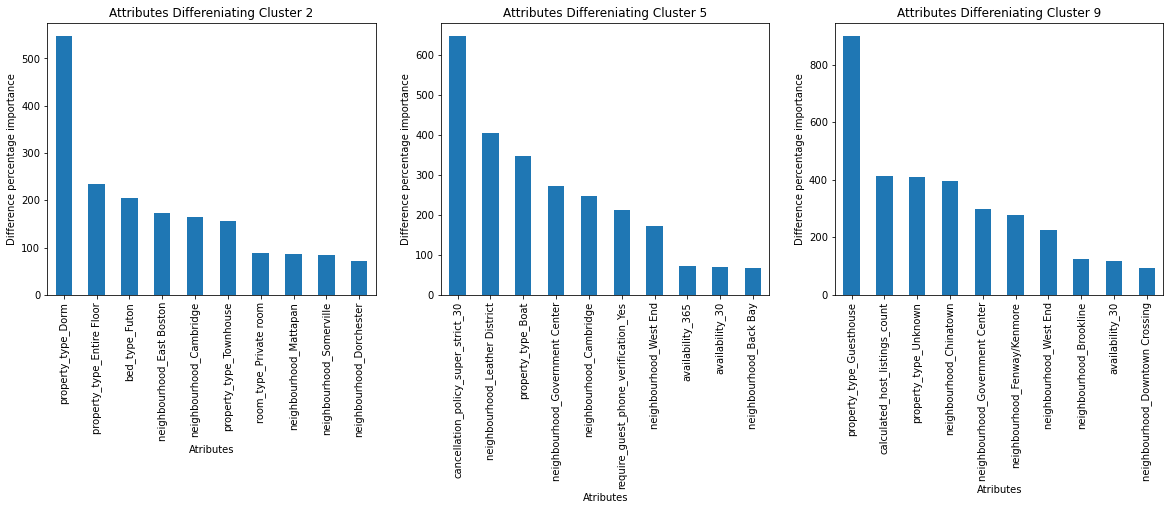

In [130]:
# Plot attributes associated with data:

plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
d[2].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 2');

plt.subplot(1,3,2)
d[5].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 5');

plt.subplot(1,3,3)
d[9].sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 9');

### From the above graph, the top attributes associated with price are:
    * property
    * bed type
    * neighbourhood
    * strict cancelation policy

# Summary:

In this project, we have analyzed Boston Airbnb data listings. Gathered Boston Airbnb listings, calendar_data and reviews_data from data@insideairbnb.com and analysed and cleaned. Used descriptive statistics and regression model(Multiple Linear Regression, Randon Forest Regression) and KMeans cluster to answer the following questions:

##### Most expensive month to visit Boston ?
* The most expensive month was Septemper month with $232.2 followed by October, November.
* March and February months was considerd as less expensive months.
* Price was spike during the month of September to November and again slightly high during the month of May.
* From June to August, avilability was stabilized.

##### Most expensive neighbourhood in Boston?
* Harvard Square was the most expensive neighbourhood city with $359 near Boston Airbnb followed by Financial District.

##### What are the top amenities people need?
* Top amenities that visitors would liked was wireless interent, followed by heating, kitchen

##### Which month do people like to visit Boston (Based on review counts)?
* August seems to be the most popular month followed by July, June, May.
* Less crowded months would be January,February and December months.

I found that the main drive for Airbnb prices were during peak months and how many people a listing can accomode. And also amenities sush as internet, tv, ac, heating... In order to get very good reviews from the visitors, it is very important to respond to their enquires. So, amenities are important. Location also very important inorder to book Airbnb.

I also found that, Random Forest Regression is the best algorithm to predict the rental price of Boston Airbnb with R2_score of 0.61 